# 🐶 Dog Breed Classifier 

This is a notebook that is built to classify dog breeds using Tensorflow  2.10.1 and Tensorflow Hub

## 1. Problem 
Identifying the dog breed based on the image 
if you see a dog you like and don't know the breed of it 

## 2. Data 
Used Data : https://www.kaggle.com/c/dog-breed-identification/data

## 3. Evaluation 
Evaluation is a file with prediiton probabilities for each dog breed of each test image 
https://www.kaggle.com/c/dog-breed-identification/overview
## 4. Features 
Data info : 
* The work is based on images (Unstructured Data ) therefor we need Deep Learning / Transfer Learning .
* Data has 120 Dog breed (meaning we are working with 120 different classes )
* There are around 10,000+ images in training set (Labeled images)
* There are around 10,000+ in the test set (Unlabeled images for prediction purposes )

## Set up the work space
  Tensorflow : https://www.tensorflow.org/install
  
  Tensorflow hub : https://www.tensorflow.org/hub/installation
 * Import Tensorflow ✅
 * Import Tensorflow Hub ✅
 * Make sure to use GPU ✅



In [1]:
# Import tools
import tensorflow as tf
import tensorflow_hub as hub 
print("Tensorflow Version is" , tf.__version__)
print("Tensorflow hub Version is" , hub.__version__)




#lets check GPU availability 
from tensorflow.python.client import device_lib

def get_available_devices():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos]

print(get_available_devices())
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print(physical_devices)




Tensorflow Version is 2.10.0
Tensorflow hub Version is 0.16.1
['/device:CPU:0', '/device:GPU:0']
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## Getting our data ready ( turning it into tensors )
with all the machine learning models , our data has to be in numerical format , 
cause tensor flow needs to have the images as numbers and it works like a matrix with diamentions 

*Tensors = Numerical Rpresentaion* 

 first we need to check out or labels ( you will need pandas , )
it did not work with me in vs code so i installed both Pandas + Matplotlib in order to display the graphs 
here is the show case  but activate the conda 

*Pandas:*

<img src="images/pandas.png" alt="Image Description" />

*Matplotlib:*
<img src="images/matplotlib.png" alt="Image Description" />






In [2]:
#lets showcase the items that we have
import pandas as pd 
labels_csv = pd.read_csv("dog-breed-identification/labels.csv")
print(labels_csv.describe())


                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126


In [3]:
labels_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [4]:
labels_csv["breed"].value_counts()

breed
scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
brabancon_griffon        67
komondor                 67
eskimo_dog               66
briard                   66
Name: count, Length: 120, dtype: int64

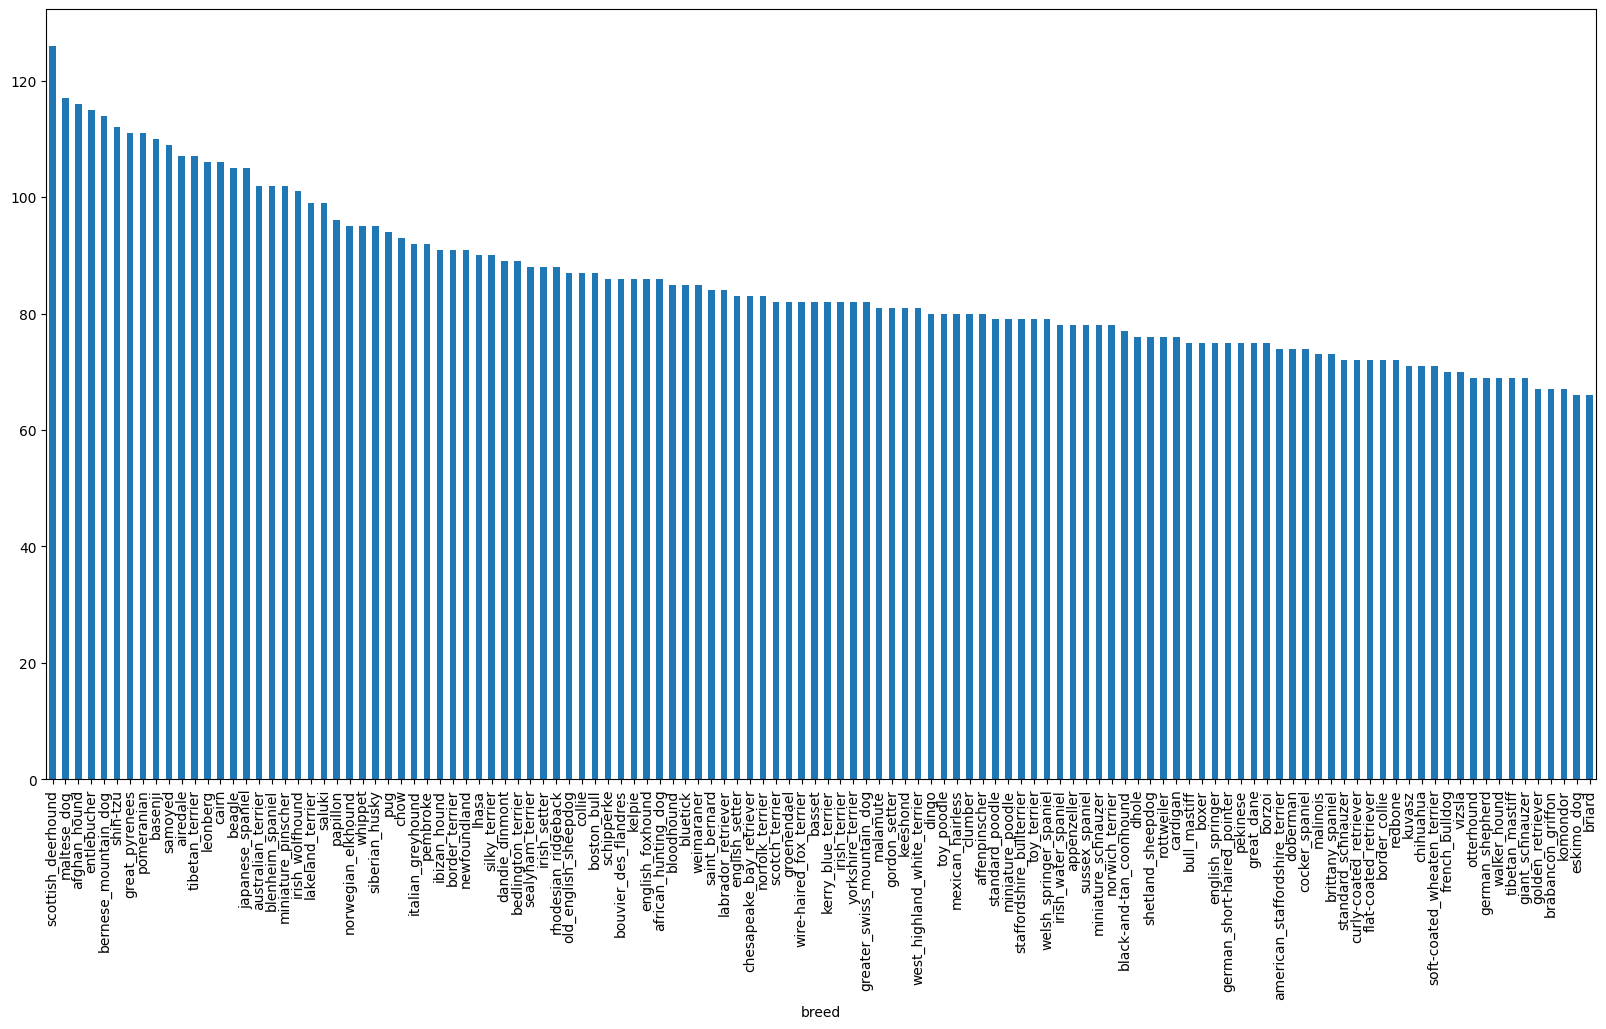

In [5]:
#Lets determine how many images do we have in our labels csv file 
labels_csv["breed"].value_counts().plot.bar(figsize =(20,10));

In [6]:
labels_csv["breed"].value_counts().mean()

85.18333333333334

In [7]:
labels_csv["breed"].value_counts().median()

82.0

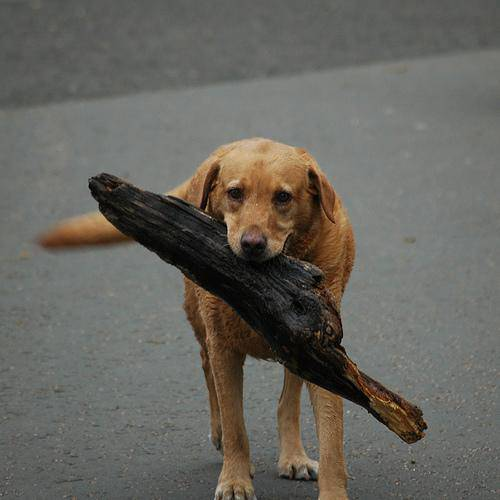

In [8]:
#Let's View an image the id is from cell 228
from IPython.display import Image 
Image("dog-breed-identification/train/0021f9ceb3235effd7fcde7f7538ed62.jpg")

### Getting images and their labels 

We need to have a list of all image files pathnames 

In [9]:
labels_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [10]:
# lets listall our images in the parantheses from Image ID's 
# to do so we have to put the images file path along the extentsion of jpg
filenames = ["dog-breed-identification/train/" +fname + ".jpg" for fname in labels_csv["id"]]
#check the first 10 
filenames[:10]

['dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'dog-breed-identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'dog-breed-identification/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'dog-breed-identification/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'dog-breed-identification/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'dog-breed-identification/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'dog-breed-identification/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'dog-breed-identification/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'dog-breed-identification/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'dog-breed-identification/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [11]:
# Check whether number of filenames matches of atual image files 
import os 
if len(os.listdir("dog-breed-identification/train/")) == len(filenames):
    print("File names match the actual amount of files !! proceed !")
else:
    print("Filenames do not match check the target directory")

File names match the actual amount of files !! proceed !


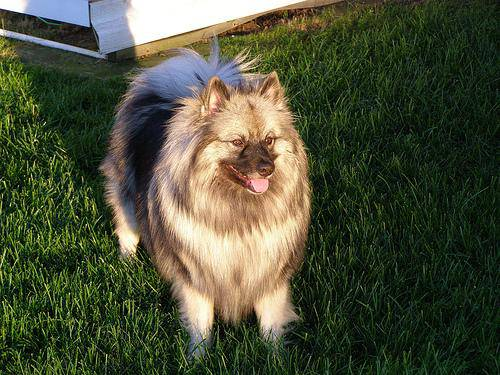

In [12]:
# one more check we have to check 
Image(filenames[4500]) 

In [13]:
#now to figure out the breed 
labels_csv["breed"][4500]

'keeshond'

 since we have turned the ID'S to file path for easy access we need now to work on our labels 


In [14]:
#again we need to turn the data type from objects to numbers so we will need numpy 
import numpy as np
labels = labels_csv["breed"]
labels = np.array(labels)
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [15]:
len(labels)

10222

In [16]:
# See the numbers of labels in file name to see if there is empty data 
# usually with unstructed data it is quite tricky to fill those 
if len(labels) == len(filenames):
    print("Number of labels match number of filenames !")
else:
    print("number of labels does not match the file name , check train diretory  ")


Number of labels match number of filenames !


In [17]:
# our objective here is to turn the array of labels (string type => int type )
# lets fine the unique label values 
unique_breeds = np.unique(labels)
len(unique_breeds)

120

In [18]:
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [19]:
# Turn a single a label to booleans 
# look at the result in the third row second column where 
#unique breed accurs it is approx the the 20th elements 
#and lets comapre it to the unique array
print(labels[0])
labels[0] ==unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [20]:
len(labels)

10222

In [21]:
#now that we have tested one label lets do it in every label 

boolean_labels = [label == unique_breeds for label in labels ]
boolean_labels[:2]


[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [22]:
len(boolean_labels)

10222

In [23]:
# Turning boolean into integers 
print(labels[0]) # original label from the data fram 
print(np.where(unique_breeds == labels[0])) # this is the index where label accurs 
print(boolean_labels[0].argmax()) # index where label occure in boolean array 
print(boolean_labels[0].astype(int)) # type conversion  ( 1 and 0's  ) the 1 is the unique one 


boston_bull
(array([19], dtype=int64),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [24]:
print(labels[2])
print(boolean_labels[2].astype(int))

pekinese
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


Currently we were able to turn our strings to numbers ( labels )
from boolean which returns true/false (0,1) then we converted
we made the file names easier to access as a string 
we still need the images to work as numbers so that is where we will be using `TensorFlow`

In [25]:

filenames[:10]

['dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'dog-breed-identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'dog-breed-identification/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'dog-breed-identification/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'dog-breed-identification/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'dog-breed-identification/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'dog-breed-identification/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'dog-breed-identification/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'dog-breed-identification/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'dog-breed-identification/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

### Creating our own `Validation Set ` 
validation is not provided by kaggle so we gotta do what we gotta do 🤷

In [26]:
# Set up x ,y variables  
x = filenames 
y = boolean_labels

Before testing and splitting it is preferable to use a portion of your data before training you ML model on it 🗒️


also such size of our sample take to much time so be mindful of that

In [27]:
len(filenames)

10222

Now we will start slow by going for ~1000 and increase whenever thers is a need📈

this line gives u a slider if u are colab 
`NUM_IMAGES = 1000 #@param {type:"slider", min:1000, max:9000, step:1000}`
i will show below how to do the same result using jupyter notebook / vsccode


install the ipywidgets 
`conda install ipywidgets` 
<img src="images/ipywidgets.png">

In [28]:
# set number of images to use for experiment 
#in deep learning hyperparaments are set by capital letters 
import ipywidgets as widgets
NUM_IMAGES =widgets.IntSlider(
    value=1000,
    min=1000,
    max=9000,
    step=1000,
    description='NUM_IMAGES:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)
NUM_IMAGES

IntSlider(value=1000, continuous_update=False, description='NUM_IMAGES:', max=9000, min=1000, step=1000)

To start splitting you will need to install scikit learn 
command `Conda install scikit-learn`
<img src = "images/scikit learn.png">
you are good when you see the word `Done`


In [29]:
#Lets staty splitting our data 
from sklearn.model_selection import train_test_split
#split them into traininf and validation of total size NUM_IMAGES 
x_train , x_val , y_train , y_val = train_test_split(x[:NUM_IMAGES.value], 
                                        y[:NUM_IMAGES.value]  , 
                                        test_size = 0.2 ,
                                     random_state=  42)   #like random seed
#np tsnfom seed is used to initialize random numbers , it is used to make your data reproducable 
len(x_train) , len(y_train) , len(x_val), len(y_val)

(800, 800, 200, 200)

In [30]:
#lets have a glimplse 
x_train[:5] , y_train[:2]

(['dog-breed-identification/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'dog-breed-identification/train/0d2f9e12a2611d911d91a339074c8154.jpg',
  'dog-breed-identification/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  'dog-breed-identification/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  'dog-breed-identification/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, 

## Now will turn our images and y labels = `boolean_labels` into Tensors 

To process our images into Tensors we are going to write a function that does a few things :
1. Take an image file as input 
2. Use Tensorflow to read a file and save it to a variable , `image` 
3. Turn the `image` ( a jpg) into Tensors 
4. Normalize our image (convert color to 0-1 for easy computing)
5. Resize the `image` to be a shape of (224 , 224)
6. Return the modified `image`

In [31]:
# Convert image to a Numpy Array 
from matplotlib.pyplot import imread; 
image = imread(filenames[42])
image.shape
#result is hight , width , RBG (Color Channel)

(257, 350, 3)

In [32]:
image.max(), image.min()

(255, 0)

In [33]:
image[:2]

array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]]], dtype=uint8)

In [34]:
#turn anything to tensors using tf.constant
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]]], dtype=uint8)>


To process our images into Tensors we are going to write a function that does a few things :
1. Take an image file as input 
2. Use Tensorflow to read a file and save it to a variable , `image` 
3. Turn the `image` ( a jpg) into Tensors 
4. Normalize our image (convert color to 0-1 for easy computing)
5. Resize the `image` to be a shape of (224 , 224)
6. Return the modified `image`

In [35]:
#Define the image size (this is needed that the images that is gonna be fed  on images of the same shape )
IMG_SIZE = 224
#Create a n for pre proceesing images 
def process_images(image_path):
    """
    Take an image file path and turns the image into a Tensor.
    """
    #Read in an image file (io input and output)
    image = tf.io.read_file(image_path)
    #Turn the jpeg images into numerical Tensors with RGB olor channels 
    image = tf.image.decode_jpeg(image , channels=3)
    #Convert the color channel values from 0-225 to 0-1 value s
    image = tf.image.convert_image_dtype(image , tf.float32)
    # Resize our image to the square value (244,244)
    image = tf.image.resize(image , size=[IMG_SIZE , IMG_SIZE] )
    return image 

## Turn our data into batches 

Instead of doing 10,000+ images in one go it will make our training very slow 
we can use 32 images in batch size to help us with processing 
the size 32 so we can proccess it in tensorflow . 


In ordet to use Tensorflow properly in this case we need  our data to be in *Tensor Tuples* which is :
`(image , label )`

In [36]:
# we need a simple function to return a tuple (image , label)
def get_image_label(image_path,label):
    """
    Take an image file path name and the associated label process 
    the image and retun the tuple (image , label )

    """
    image = process_images(image_path)
    return image , label 


In [37]:
# Demo of the above
# if you get the dtype as = bool i run everything again it will work properly 
(process_images(x[42]), tf.constant(y[42]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117757],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

Now we have got a way to turn our data into tuples and Tensors 
in the form `(image , label)` we shall create a function that turns all of our data `(x , y)` into batches

In [38]:
# Define the batch size , 32 is a good start for easy computing 
BATCH_SIZE = 32 
# Create a function that turns data into batches 
#these functions differs on purpose whether it is a training , testing , validation data batch
def create_data_batches(x , y = None ,batch_size =  BATCH_SIZE , valid_data = False , test_data = False):
    """
    Creates batches of data our of image (x) and label (y) paris 
    Shuffles the data (for adaptibality) but doesnt shuffle if it is validation data.
    also accepts test data as input (no labels). and that is why Y is none in this functon 
    """
    # if the data is a test data set we dont have labels y = mnone 
    if test_data:
        print("Creating test data batches ...")
        # passes tensors and creates a data set based on that 
        data = tf.data.Dataset.from_tensor_slices(tf.constant(x)) #ONLY FILE PATHS NO LABELS (TURNS X INTO TENSORS)
        # calling the function that turn images into tensors and then turn it into batch 
        # it will batch the data with the size of 32 and that is why we defined it above 
        data_batch = data.map(process_images).batch(BATCH_SIZE)
        return data_batch 
    # if the data is a valid dataset , we do not need to shuffle it 
    elif valid_data:
        print("Creating validation data batches ...")
        #x = file paths , y = labels 
        data = tf.data.Dataset.from_tensor_slices((tf.constant(x), tf.constant(y)))                                                                        
        data_batch = data.map(get_image_label).batch(BATCH_SIZE)
        return data_batch 
    else:
        print("Creating a training data batches ...")
        # Turn file paths and labels into tensors 
        data = tf.data.Dataset.from_tensor_slices((tf.constant(x), tf.constant(y)))                                                                        
        # Shuffling path names and labels before we mapping image processer function 
        # it is preferable to shuffle first before mapping , it easier 
        data = data.shuffle(buffer_size = len(x))
        # create an (image , label) tuples this also turns image path into a preprocessed images
        data = data.map(get_image_label)
        # turn the training data into batches 
        data_batch = data.batch(BATCH_SIZE)
        return data_batch


In [39]:
# Creating training and validation data batches  x for training and y for validation 
train_data = create_data_batches(x_train , y_train)
val_data = create_data_batches(x_val , y_val ,valid_data= True)

Creating a training data batches ...
Creating validation data batches ...


In [40]:
# Check out the difference attribute of our data batches 
train_data.element_spec , val_data.element_spec
#the output 
# training data , it says none cause the image size is flexible 

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

### Visualizing Data Batches 
Our data is now in batches but they are hard to read

In [41]:
import matplotlib.pyplot as plt 
#Create a function for vieweing image in data batch 
def show_25_images(images , labels):
    """
    Displayes a plot of a 25 images and their labels from a data batch 
    """
    #Set up the figure 
    plt.figure(figsize=(10,10))
    #loop through the 25 (for displaying 25 images )
    for i in range(25):
        #Create suplots(5 rows, 5 columns , index)
        ax = plt.subplot(5 , 5 ,i+1)
        # Display an image 
        plt.imshow(images[i])
        # Add the image label as the title 
        plt.title(unique_breeds[labels[i].argmax()])
        #turn the grid lines off 
        plt.axis("off")
       


to visualize we have to unbatch

In [42]:
#this batch needs to be turned to an iterator 
train_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [43]:
train_images , train_labels = next(train_data.as_numpy_iterator())
train_images , train_labels

(array([[[[0.90729976, 0.92298603, 0.91906446],
          [0.9255655 , 0.94125175, 0.9373302 ],
          [0.9524435 , 0.96812975, 0.9642082 ],
          ...,
          [0.34106675, 0.36281282, 0.33297095],
          [0.33888957, 0.34500965, 0.33199257],
          [0.28974843, 0.29362625, 0.2883829 ]],
 
         [[0.98800635, 0.99981475, 0.999771  ],
          [0.9591429 , 0.9748292 , 0.9709076 ],
          [0.9620414 , 0.97772765, 0.9738061 ],
          ...,
          [0.3465248 , 0.32665434, 0.31105563],
          [0.34905255, 0.32133895, 0.29779625],
          [0.36334115, 0.33557364, 0.31198364]],
 
         [[0.96565366, 0.98133993, 0.97741836],
          [0.96283096, 0.97851723, 0.97459567],
          [0.97204715, 0.9877334 , 0.98381186],
          ...,
          [0.2840955 , 0.22214694, 0.21967846],
          [0.2957266 , 0.22903019, 0.20121498],
          [0.30591857, 0.23666972, 0.20233843]],
 
         ...,
 
         [[0.34675357, 0.6800869 , 0.69969475],
          [0.35234

In [44]:
# the length is 32 due having the batch size as ew 
len(train_images ), len(train_labels)

(32, 32)

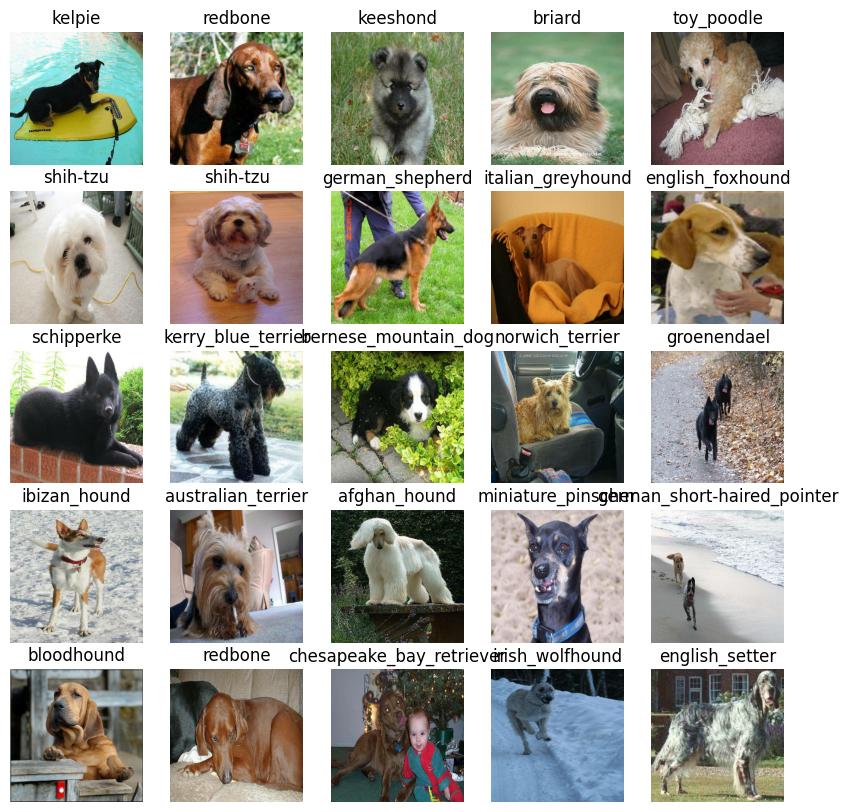

In [45]:
#now lets visualize the data in a training batch 
#each time you run tis the dogs images will be idfferent cause we are shuffleing 
show_25_images(train_images , train_labels)

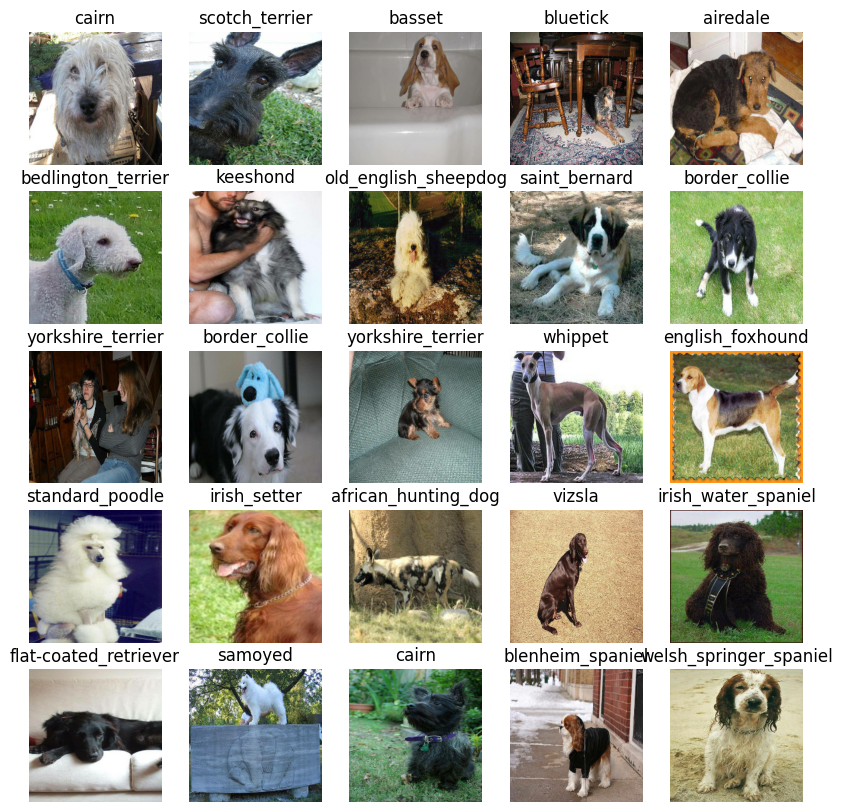

In [46]:
# Now lets visisualize our validation set 
#the data doesnt shuffle you will see repeated images when u run 
val_images , val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images , val_labels)

## Building a model 
There are multiple ways to build a model , we can go from scratch or use `scratch learning ` and by that it means that we used an already existing model do help us with our problem 

we need to define the following 
1. Input imshape (images in a form of tensors) of our model 
2. Output shape (image labels in the form of tensors ) of our model 
3. The URL of the model we want to use (this is where tensorflow hub comes in handy)


In [47]:
IMG_SIZE

224

In [48]:
#set up input shape to the model 
# the syntax is baesd on the results of cell:265  TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None) 
INPUT_SHAPE = [None , IMG_SIZE , IMG_SIZE , 3] #batch , height , width , color channsl 

#set the outut shape 
OUTPUT_SHAPE = len(unique_breeds) # 120

#set up model URL from TensorflowHub 
MODEL_URL = "https://kaggle.com/models/google/mobilenet-v2/TensorFlow2/130-224-classification/1"

Now we got our inputs , outputs , and model ready now we need to put them in a keras deep learning model 

Knowing this info , we will create a function that does the following 
* Take both input and output shapes and the model as parameters
* Define the layers in a layers mode in a sequenctial method ( do this ,then ) 
* Compile the model (evaluation and improving the model)
* Build the model ( tell the model the input shape that it will be getting )
* Return the model 

Link for further reading about the steps: https://www.tensorflow.org/guide/keras

activation comaparision 
<img src="https://miro.medium.com/v2/resize:fit:1400/1*IhP8BdoUpAbssltq0VBafg.png"/>

In [49]:
# Create a function that builds a keras model 

def create_model(input_shape = INPUT_SHAPE , output_shape=OUTPUT_SHAPE , model_url = MODEL_URL):
    print("Building model with : " ,MODEL_URL)
    # Set up the model layers
    model = tf.keras.Sequential([
    hub.KerasLayer(MODEL_URL), #Layer 1 (input layer)
    tf.keras.layers.Dense(units=OUTPUT_SHAPE , activation="softmax") #Layer 2 (output layer)
    
    
    ])
    
     #Compile the models 
    model.compile(
        #the lowest the loss the heigher the model is performing 
          loss = tf.keras.losses.CategoricalCrossentropy(),
          #this is one of the most ideal optimizers for models 
          optimizer=tf.keras.optimizers.Adam(),
          metrics=["accuracy"]
         
     )
    #build the model 
    model.build(INPUT_SHAPE)
    return model 

the more you run the more of sequential numbers you will get , i ran four times that is why i have 4


In [50]:
model = create_model()
model.summary()

Building model with :  https://kaggle.com/models/google/mobilenet-v2/TensorFlow2/130-224-classification/1
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


## Creating callbacks

Callbacks are helper function a model can use during training do such things as save it's progress , check it's progress or stop training only if the model stops training 

We will csreate two callbaks , one for TensorBoard which helps trak our models progress and another fo rearly stopping which prevents our model from training too long . 

## TensoBoard Callback
To set up a TensorBoard we need to do 3 steps 
1. Load the TensorBoard notebook extension ✅
2. Create a TensorBoard callback is able to sabe logs to a directory and pass it to our models `fit()` function ✅
3. Visiualize our models training logs with the `%tensorboard` magic function 

In [51]:
# Load TensorBoard notebook extension 
%load_ext tensorboard 

In [52]:
import datetime
# Create a function to build a TensorBoard callback 
def create_tensorboard_callback():
    # Create a log diretory for storing TensorBoard logs 
    logdir = os.path.join("dog-breed-identification/logs",
        #Make it so the logs get tracked whenever we run a fit experminet 
        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
    return tf.keras.callbacks.TensorBoard(logdir)   
                          
                          


### Early Stopping Callback
Early stopping helps stop our model from overfitting by stopping training if a certain evaluation metrics stops 
https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping


In [53]:
# Create early stopping callback 
early_stopping = tf.keras.callbacks.EarlyStopping(monitor ="val_accuracy" , patience=3 )

## Training a model (on subset data)

Our first model is only going to train on 1000 images to makes sure that everything is working ( all above code )

. We need the number of EPOCHS which is the number of the passes that we need to pass to our model 

In [54]:
NUM_EPOCHS = 100 
import ipywidgets as widgets
NUM_EPOCHS =widgets.IntSlider(
    value=10,
    min=10,
    max=100,
    step=10,
    description='NUM_EPOCHS:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)
NUM_EPOCHS

IntSlider(value=10, continuous_update=False, description='NUM_EPOCHS:', min=10, step=10)

`EPOCHS`
 allow the model to go a one time to the training set , validate it and then test it in our case we are using 100 so apply the same logic just with 100's

In [55]:
# check to make sure that we still run on a GPU 
print("GPU", "available(YEES)" if tf.config.list_physical_devices("GPU") else "not available :(" )

GPU available(YEES)


Let's create a functin whih trains a model . 
* Create a model usint `create_model()`
* Setup a TensorBoard callback using `create_tensorboard_callback`
* Call the `fit()` function of our model passsing it the training data , validation data , number of epochs to train for (`NUM_EPOCHS`) and the callbacks we would use 
* Return the model 

# Build a function to train and return a trained model 
def train_model():
    """
     Trains a given model and returns the trained version 
    """
    # Create a model 
    model = create_model()
    #create a new TensorBoard session everytime we train a model 
    tensorboard = create_tensorboard_callback()
    # Fit the model to the data passing it the callbacks we
    model.fit(x = train_data ,
              #BATCH_SIZE = 32 ,
              epochs = NUM_EPOCHS , 
              validation_data = val_data, 
              validation_freq = 1 , 
              callbacks = [tensorboard , early_stopping]
              )
    return model 


In [56]:

def train_model(train_data, val_data, NUM_EPOCHS, early_stopping):
    """
    Trains a given model and returns the trained version.
    
    Args:
    - train_data: Training data.
    - val_data: Validation data.
    - NUM_EPOCHS: Number of epochs for training.
    - early_stopping: Early stopping callback.
    
    Returns:
    - Trained model.
    """
    # Extract the integer value from the IntSlider object
    # because i was using a slider it was not willing to run due the fact that it was not recongizing the NUM_EPOCHS as a vlue 
    epochs = NUM_EPOCHS.value
    
    # Create a model 
    model = create_model()
    
    # Create a new TensorBoard session every time we train a model 
    tensorboard = create_tensorboard_callback()
    
    # Fit the model to the data passing it the callbacks
    model.fit(x=train_data,
              epochs=epochs,
              validation_data=val_data,
              validation_freq=1,
              callbacks=[tensorboard, early_stopping])
    
    return model 

In [57]:
# fit the mode data 
model = train_model(train_data, val_data, NUM_EPOCHS, early_stopping)

Building model with :  https://kaggle.com/models/google/mobilenet-v2/TensorFlow2/130-224-classification/1
Epoch 1/10
25/25 [==============================] - 19s 241ms/step - loss: 4.7039 - accuracy: 0.0838 - val_loss: 3.4131 - val_accuracy: 0.2650
Epoch 2/10
25/25 [==============================] - 4s 142ms/step - loss: 1.6838 - accuracy: 0.6737 - val_loss: 2.1939 - val_accuracy: 0.4900
Epoch 3/10
25/25 [==============================] - 3s 139ms/step - loss: 0.5718 - accuracy: 0.9375 - val_loss: 1.7052 - val_accuracy: 0.5850
Epoch 4/10
25/25 [==============================] - 4s 139ms/step - loss: 0.2555 - accuracy: 0.9900 - val_loss: 1.5201 - val_accuracy: 0.6350
Epoch 5/10
25/25 [==============================] - 4s 143ms/step - loss: 0.1471 - accuracy: 0.9975 - val_loss: 1.4411 - val_accuracy: 0.6500
Epoch 6/10
25/25 [==============================] - 4s 147ms/step - loss: 0.1006 - accuracy: 0.9987 - val_loss: 1.3892 - val_accuracy: 0.6550
Epoch 7/10
25/25 [=======================

Based on our results our model is considered to be **Overfitting** how do i know this?? i know from the result  of the trianing data being way higher tan the validatin dataset , below i will explain on how we can fix this 
the training is hitting 100% !!!😱
**Overfitting** is not usually a bad thing but in general it might be bad only when there is new data and it might predict somethings wrong
<img src="images/overfitting.png">

### Checking the TensorBoard logs 
the TensorBoard magic function (`%tensorboard`) will acess the logs directory we created earlier and visualize the conetnets 
* Note that each time we run this line 
`model = train_model(train_data, val_data, NUM_EPOCHS, early_stopping)` we will get two logs folder meaning two models it is so useful if you want to compare two models 

In [58]:
# now to specify file paths in this case it wont be in a string form it will be like the command line no strings 

%tensorboard --logdir dog-breed-identification/logs

Reusing TensorBoard on port 6006 (pid 14856), started 2 days, 6:16:32 ago. (Use '!kill 14856' to kill it.)

### Making and evaluating predictions using a trained model 

In [59]:
val_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [60]:
# Make predictions on the validation data (not used to to train )
predictions = model.predict(val_data , verbose=1)
predictions 

7/7 [==============================] - 1s 95ms/step


array([[7.1727773e-03, 7.3695538e-04, 3.0983232e-03, ..., 1.6115893e-04,
        8.8929187e-04, 2.7334134e-03],
       [2.6022161e-03, 1.5977313e-03, 5.2228062e-03, ..., 4.3311535e-04,
        1.0357022e-03, 2.0382082e-04],
       [3.3210981e-05, 4.7619743e-04, 1.4658403e-04, ..., 3.4547792e-04,
        1.5905181e-05, 1.5493084e-03],
       ...,
       [1.9595547e-05, 2.6380663e-05, 7.0416296e-05, ..., 5.5259527e-05,
        8.0359168e-06, 5.7110734e-05],
       [7.1713584e-03, 1.1745194e-03, 1.5944758e-04, ..., 5.7539850e-04,
        2.0919787e-04, 2.5443804e-02],
       [6.6420727e-04, 9.1138732e-05, 1.4194349e-03, ..., 1.9788854e-02,
        6.1563461e-04, 3.3597604e-04]], dtype=float32)

In [61]:
predictions[0]

array([7.17277732e-03, 7.36955379e-04, 3.09832324e-03, 4.09347238e-04,
       1.53819419e-04, 8.10541896e-05, 4.96867858e-02, 3.15401191e-03,
       1.00795682e-04, 1.83505611e-03, 6.10326929e-03, 3.30027775e-04,
       4.76062414e-04, 2.30848949e-04, 1.35324022e-03, 8.48046795e-04,
       3.57257995e-05, 6.43099248e-02, 2.54139650e-05, 5.55975748e-05,
       3.28477519e-03, 5.99690655e-04, 1.27561332e-04, 1.66560654e-02,
       3.32742966e-05, 3.68293404e-04, 7.96915591e-02, 2.62090791e-04,
       7.54046196e-04, 4.29741776e-04, 1.83383585e-04, 1.04263204e-03,
       7.71596679e-04, 8.03119474e-05, 8.54722573e-04, 5.96835278e-02,
       2.37250555e-04, 1.29078151e-04, 2.43417337e-04, 7.77701789e-05,
       4.29175841e-03, 6.63964820e-05, 1.00837548e-04, 3.46699351e-04,
       2.75627717e-05, 1.31267600e-03, 2.70421035e-04, 3.39540595e-04,
       1.20478944e-04, 3.74524319e-03, 1.04558734e-04, 5.26900039e-05,
       1.36045041e-03, 9.86888117e-05, 5.34592546e-04, 3.43937689e-04,
      

In [62]:
np.sum(predictions[0])

1.0000001

In [63]:
np.sum(predictions[1])

0.99999994

In [64]:
predictions.shape

(200, 120)

In [65]:
len(y_val)

200

In [66]:
len(unique_breeds)

120

In [67]:
predictions[0]

array([7.17277732e-03, 7.36955379e-04, 3.09832324e-03, 4.09347238e-04,
       1.53819419e-04, 8.10541896e-05, 4.96867858e-02, 3.15401191e-03,
       1.00795682e-04, 1.83505611e-03, 6.10326929e-03, 3.30027775e-04,
       4.76062414e-04, 2.30848949e-04, 1.35324022e-03, 8.48046795e-04,
       3.57257995e-05, 6.43099248e-02, 2.54139650e-05, 5.55975748e-05,
       3.28477519e-03, 5.99690655e-04, 1.27561332e-04, 1.66560654e-02,
       3.32742966e-05, 3.68293404e-04, 7.96915591e-02, 2.62090791e-04,
       7.54046196e-04, 4.29741776e-04, 1.83383585e-04, 1.04263204e-03,
       7.71596679e-04, 8.03119474e-05, 8.54722573e-04, 5.96835278e-02,
       2.37250555e-04, 1.29078151e-04, 2.43417337e-04, 7.77701789e-05,
       4.29175841e-03, 6.63964820e-05, 1.00837548e-04, 3.46699351e-04,
       2.75627717e-05, 1.31267600e-03, 2.70421035e-04, 3.39540595e-04,
       1.20478944e-04, 3.74524319e-03, 1.04558734e-04, 5.26900039e-05,
       1.36045041e-03, 9.86888117e-05, 5.34592546e-04, 3.43937689e-04,
      

In [68]:
# First Prediction
index = 0 
print(predictions[0])
print(f"Max value (probability of predictions):{np.max(predictions[0])}")
print(f"Sum: {np.sum(predictions[index])}")
print(f"MAX INDEX : {np.argmax(predictions[index])}")
print(f"Predicted label : {unique_breeds[np.argmax(predictions[index])]}")

[7.17277732e-03 7.36955379e-04 3.09832324e-03 4.09347238e-04
 1.53819419e-04 8.10541896e-05 4.96867858e-02 3.15401191e-03
 1.00795682e-04 1.83505611e-03 6.10326929e-03 3.30027775e-04
 4.76062414e-04 2.30848949e-04 1.35324022e-03 8.48046795e-04
 3.57257995e-05 6.43099248e-02 2.54139650e-05 5.55975748e-05
 3.28477519e-03 5.99690655e-04 1.27561332e-04 1.66560654e-02
 3.32742966e-05 3.68293404e-04 7.96915591e-02 2.62090791e-04
 7.54046196e-04 4.29741776e-04 1.83383585e-04 1.04263204e-03
 7.71596679e-04 8.03119474e-05 8.54722573e-04 5.96835278e-02
 2.37250555e-04 1.29078151e-04 2.43417337e-04 7.77701789e-05
 4.29175841e-03 6.63964820e-05 1.00837548e-04 3.46699351e-04
 2.75627717e-05 1.31267600e-03 2.70421035e-04 3.39540595e-04
 1.20478944e-04 3.74524319e-03 1.04558734e-04 5.26900039e-05
 1.36045041e-03 9.86888117e-05 5.34592546e-04 3.43937689e-04
 1.44768937e-03 9.82167758e-03 1.06235791e-03 1.50128216e-01
 6.04052970e-04 2.26478824e-05 1.39487989e-03 6.23348024e-05
 7.36547154e-05 1.201630

In [69]:
# First Prediction
index = 42
print(predictions[0])
print(f"Max value (probability of predictions):{np.max(predictions[0])}")
print(f"Sum: {np.sum(predictions[index])}")
print(f"MAX INDEX : {np.argmax(predictions[index])}")
print(f"Predicted label : {unique_breeds[np.argmax(predictions[index])]}")

[7.17277732e-03 7.36955379e-04 3.09832324e-03 4.09347238e-04
 1.53819419e-04 8.10541896e-05 4.96867858e-02 3.15401191e-03
 1.00795682e-04 1.83505611e-03 6.10326929e-03 3.30027775e-04
 4.76062414e-04 2.30848949e-04 1.35324022e-03 8.48046795e-04
 3.57257995e-05 6.43099248e-02 2.54139650e-05 5.55975748e-05
 3.28477519e-03 5.99690655e-04 1.27561332e-04 1.66560654e-02
 3.32742966e-05 3.68293404e-04 7.96915591e-02 2.62090791e-04
 7.54046196e-04 4.29741776e-04 1.83383585e-04 1.04263204e-03
 7.71596679e-04 8.03119474e-05 8.54722573e-04 5.96835278e-02
 2.37250555e-04 1.29078151e-04 2.43417337e-04 7.77701789e-05
 4.29175841e-03 6.63964820e-05 1.00837548e-04 3.46699351e-04
 2.75627717e-05 1.31267600e-03 2.70421035e-04 3.39540595e-04
 1.20478944e-04 3.74524319e-03 1.04558734e-04 5.26900039e-05
 1.36045041e-03 9.86888117e-05 5.34592546e-04 3.43937689e-04
 1.44768937e-03 9.82167758e-03 1.06235791e-03 1.50128216e-01
 6.04052970e-04 2.26478824e-05 1.39487989e-03 6.23348024e-05
 7.36547154e-05 1.201630

In [70]:
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [71]:
unique_breeds[113]

'walker_hound'

Having the above functionality is great but we need to it on scale , and itis good tosee an image of the predictions that we have been m aking off 

**Note:** Prediction probabilities are also knows as confidene level 

In [72]:
#turn predicction probabilities into their respective label (easier to understand) 
def get_pred_label(prediction_probabilities):
    """
    Turns an array of prediction probabilities into a label
    """
    return unique_breeds[np.argmax(prediction_probabilities)]

# get a predicted label basedo on array of prediciton probabilitie s
pred_label = get_pred_label(predictions[81])
pred_label 

'dingo'

since our validation data is still in a batch dataset , we will have to unbatch it to make predictoins on the validation images , and compare this images to the validation labels(trueth labels)

In [73]:
val_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [74]:
#create a funtion to unbatch a dataset 
def unbatchify(data):
    """
    Takes a batched dataset of (image , label ) Tensors and returns separate arrays of image and labels 
    """
    #unbatching function 
    images =[]
    labels =[]
      #loob through unbatched data 
    for image , label in data.unbatch().as_numpy_iterator():
        images.append(image)
        labels.append(unique_breeds[np.argmax(label)])

    return images ,labels
 #Unbatchify the validation data 
val_images , val_labels = unbatchify(val_data)
val_images[0] , val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.27701408, 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

Now we are able to do the following 
* Prediction labels 
* Validation labels (truth labels)
* Validation images 

now we need to make a funtion to visiualize 

We'll create a function which does the following : 
* Takes an array of prediction of probabilities and array of truth labels and arrays of image and integer ✅
* Convert the prediction probabilities to a predicted label . ✅
* Plot the predicted label , it's predicted probability , the truth label and the target image in a one plot ✅


In [75]:
def plot_pred(prediction_probabilities , labels , images  , n =1):
    """
    View athe predictions , ground truth and image for sample n 
    """
    pred_prob , true_label , image = prediction_probabilities[n] , labels[n] , images[n]
    # Get the pred label 
    pred_label = get_pred_label(pred_prob)

    # Plot image and remove ticks
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])

    #Change the color  of the title depending on if the predictons is right or wrong 
    if pred_label == true_label:
        color = "green"
    else:
        color = "red"

    #Change the plot title to be predicted , probability of prediction and truth label 
    # the line in the middle reduces the decimals 
    plt.title("{} {:2.0f}% {}.".format(pred_label , 
    np.max(pred_prob)*100 , 
    true_label) ,
    color = color  )


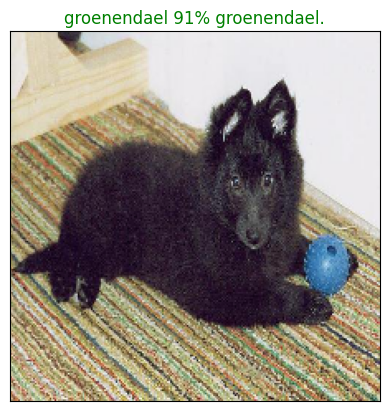

In [76]:
plot_pred(prediction_probabilities = predictions ,
         labels = val_labels , 
         images = val_images , 
         n= 77)

Lets make a function that plots the top 10 prediction 
the function will do the following :
* Take an input of predicition probabilities array and a ground truth array and an integer ✅
* Find the predictions using `get_pred_label`✅
* Find the top 10:
  * Prediction probabilities indexes ✅
  * Prediction probabilities values ✅
  * Prediction labels ✅
* Plot the top 10 predictions values and labels and coloring the true labels green ✅

In [77]:
def plot_pred_conf(prediction_probabilities , labels , n=1):
    """
    Plus the top 10 highest prediction condifene along with the truth label for sample n 
    """
    pred_prob , true_label = prediction_probabilities[n] , labels[n]

    #get the predicted label 
    pred_label = get_pred_label(pred_prob)

    # Find the top 10 prediction confidence indexes 
    
    top_10_pred_indexes = pred_prob.argsort()[-10::][::-1]
    #find the confidence value sof the top 10 
    top_10_pred_values  = pred_prob[top_10_pred_indexes]
    # find the top 10 prediction labels 
    top_10_pred_labels = unique_breeds[top_10_pred_indexes]

    #set up a plot 
    top_plot = plt.bar(np.arange(len(top_10_pred_labels)), 
                    top_10_pred_values ,
                     color = "grey")
    plt.xticks(np.arange(len(top_10_pred_labels)), 
                labels = top_10_pred_labels , 
                rotation = "vertical")
   #change the color of the true value 
    if np.isin(true_label , top_10_pred_labels):
     top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
    else: 
       pass 

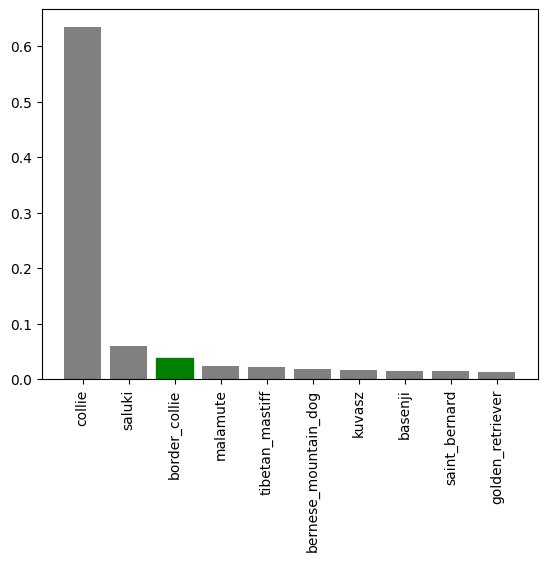

In [78]:
plot_pred_conf(prediction_probabilities = predictions , 
labels = val_labels , 
n=9 )

We have a few methods to hlep us visuallize lets check what we have

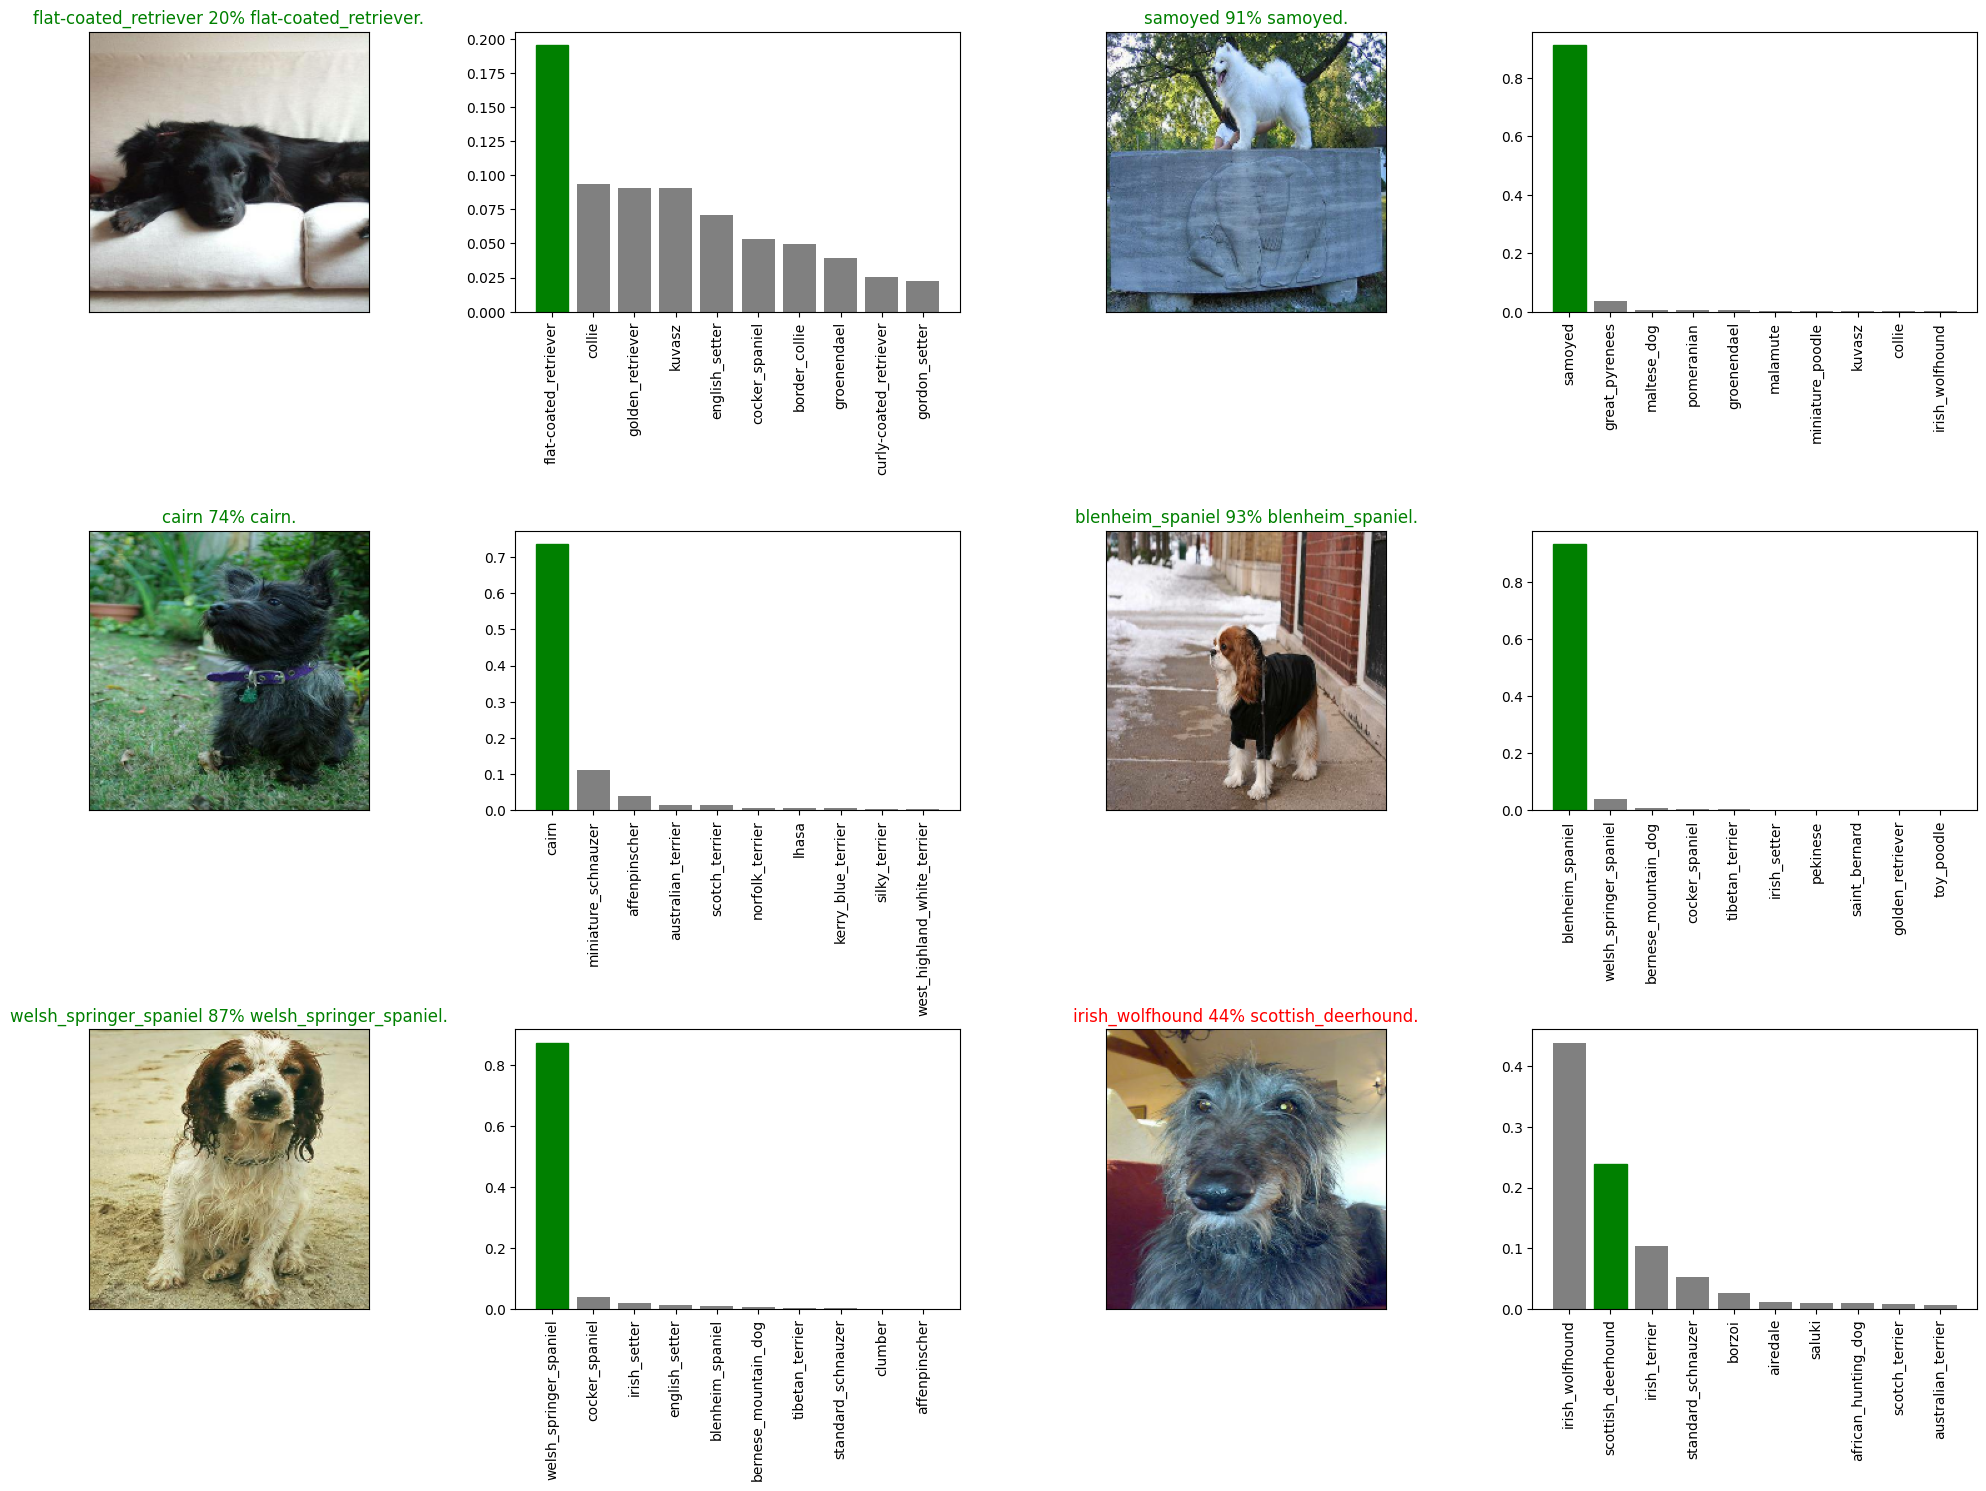

In [84]:
# Lets see a few predictions and their different values
i_multiplier = 20
num_rows = 3 
num_cols = 2 
num_images = num_rows * num_cols
plt.figure(figsize=(10*num_cols,5*num_rows))
for i in range(num_images):
    plt.subplot(num_rows , 2*num_cols , 2*i+1)
    plot_pred(prediction_probabilities=predictions , 
              labels = val_labels , 
              images = val_images ,
              n = i+i_multiplier
              )
    plt.subplot(num_rows , 2*num_cols , 2*i+2)
    plot_pred_conf(prediction_probabilities=predictions ,
                   labels = val_labels , 
                   n =i + i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()
    
            


## Saving and loading the model 
documentation : https://www.tensorflow.org/tutorials/keras/save_and_load

In [93]:
# Create a function to save a model 
def save_model(model , suffix=None):
    """
    save a given model in a models directory and appends a suffix that is a string
    """
# Create a model directory with the ncurrent time 
    modeldir = os.path.join("dog-breed-identification/models", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
#hf extension is standing for Hierarchical data format save model extension 
    model_path = modeldir + "-" + suffix +".h5"
    print(f"saving model to {model_path}....")
    model.save(model_path)
    return model_path

In [103]:
#Create a function to load a training model 
def load_model(model_path):
    """
    Loads a saved model from a saved file 
    """
    print(f"loading a saved model from {model_path}....")
    model = tf.keras.models.load_model(model_path,
                                 custom_objects={"KerasLayer":hub.KerasLayer})
    return model 

Now we have got funtions to save and load a trained model lets test 

In [104]:
# Save our model that was tained on a 1000 images 
save_model(model , suffix="1000-images-mobilenetv2-Adam")


saving model to dog-breed-identification/models\20240525-043003-1000-images-mobilenetv2-Adam.h5....


'dog-breed-identification/models\\20240525-043003-1000-images-mobilenetv2-Adam.h5'

In [105]:
# load a trained model 
loaded_1000_image_model = load_model("dog-breed-identification//models/20240525-042445-1000-images-mobilenetv2-Adam.h5")
#if you by chance get a warning in your output it is fine they can be ignored according to the documentaion 


loading a saved model from dog-breed-identification//models/20240525-042445-1000-images-mobilenetv2-Adam.h5....


In [106]:
# Evaluate the pre-saved model 
model.evaluate(val_data)

7/7 [==============================] - 1s 98ms/step - loss: 1.2927 - accuracy: 0.6650


[1.2926753759384155, 0.6650000214576721]

In [107]:
#Evaluate the loaded model 
loaded_1000_image_model.evaluate(val_data)
#you will be ok if both results return the same number 

7/7 [==============================] - 2s 91ms/step - loss: 1.2927 - accuracy: 0.6650


[1.2926753759384155, 0.6650000214576721]

## Training the Dog Breed Classifier on a the full data🐶

In [108]:
len(x), len(y) #x is file names , y , all the labels

(10222, 10222)

In [112]:
# create a data batch with the full dataset 
full_data = create_data_batches(x,y)

Creating a training data batches ...


In [113]:
full_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [114]:
# create a mdoel for full model 
full_model = create_model()

Building model with :  https://kaggle.com/models/google/mobilenet-v2/TensorFlow2/130-224-classification/1


In [115]:
# create full model callbaks
full_model_tensorboard = create_tensorboard_callback()
# no validation set when training on all the data so we cannot monitor validation accuraty 
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy" ,patience = 3 )

**NOTE:**: since we are working on a full data set running this cell will take a long time around 30 minutes or more 
took me 11 minutes

In [117]:
#fit the full model to the full data 
epochs = NUM_EPOCHS.value
full_model.fit(x=full_data ,
               epochs =epochs ,
               callbacks=[full_model_tensorboard ,full_model_early_stopping])

Epoch 1/10
320/320 [==============================] - 76s 218ms/step - loss: 1.3595 - accuracy: 0.6655
Epoch 2/10
320/320 [==============================] - 46s 143ms/step - loss: 0.4054 - accuracy: 0.8790
Epoch 3/10
320/320 [==============================] - 57s 178ms/step - loss: 0.2385 - accuracy: 0.9335
Epoch 4/10
320/320 [==============================] - 45s 140ms/step - loss: 0.1564 - accuracy: 0.9612
Epoch 5/10
320/320 [==============================] - 60s 186ms/step - loss: 0.1082 - accuracy: 0.9786
Epoch 6/10
320/320 [==============================] - 83s 257ms/step - loss: 0.0789 - accuracy: 0.9860
Epoch 7/10
320/320 [==============================] - 88s 271ms/step - loss: 0.0589 - accuracy: 0.9909
Epoch 8/10
320/320 [==============================] - 91s 283ms/step - loss: 0.0461 - accuracy: 0.9938
Epoch 9/10
320/320 [==============================] - 78s 242ms/step - loss: 0.0377 - accuracy: 0.9957
Epoch 10/10
320/320 [==============================] - 71s 220ms/step - l

In [138]:
save_model(full_model, suffix="full-image-set-mobilenetb2-Adam")

saving model to dog-breed-identification/models\20240525-062834-full-image-set-mobilenetb2-Adam.h5....


'dog-breed-identification/models\\20240525-062834-full-image-set-mobilenetb2-Adam.h5'

In [139]:
loaded_full_model=load_model("dog-breed-identification/models/20240525-054203-full-image-set-mobilenetb2-Adam.h5")

loading a saved model from dog-breed-identification/models/20240525-054203-full-image-set-mobilenetb2-Adam.h5....


## Making predictions on the test data since we cannot use validation on the full model 
since our training data format was a Tensor Batch formmat we have to apply the same on the test data

steps on what will do 
* Get the test image filenames✅
* Convert the filenames into test data bathes usign `create_data_batches` and setting `test_data` to `True` since the test data doesnt have labels ✅
* Making a predicton array by passing the test using `predict`

In [152]:
# load the test image filename 
test_path = "dog-breed-identification/test/"
test_filenames =[test_path + fname for fname in os.listdir(test_path)]
test_filenames[:10]

['dog-breed-identification/test/000621fb3cbb32d8935728e48679680e.jpg',
 'dog-breed-identification/test/00102ee9d8eb90812350685311fe5890.jpg',
 'dog-breed-identification/test/0012a730dfa437f5f3613fb75efcd4ce.jpg',
 'dog-breed-identification/test/001510bc8570bbeee98c8d80c8a95ec1.jpg',
 'dog-breed-identification/test/001a5f3114548acdefa3d4da05474c2e.jpg',
 'dog-breed-identification/test/00225dcd3e4d2410dd53239f95c0352f.jpg',
 'dog-breed-identification/test/002c2a3117c2193b4d26400ce431eebd.jpg',
 'dog-breed-identification/test/002c58d413a521ae8d1a5daeb35fc803.jpg',
 'dog-breed-identification/test/002f80396f1e3db687c5932d7978b196.jpg',
 'dog-breed-identification/test/0036c6bcec6031be9e62a257b1c3c442.jpg']

In [153]:
len(test_filenames)

10357

In [154]:
#create a test data batch
test_data = create_data_batches(test_filenames ,test_data = True )

Creating test data batches ...


In [155]:
test_data

<BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

**Note** : this will take time to run due full model

In [156]:
# Make predictions on test data batch using the loaded full model 
test_predictions = loaded_full_model.predict(test_data , verbose =1)

324/324 [==============================] - 51s 159ms/step


In [ ]:
# Save predictions (Numpy array to csv file)(for access later)
np.savetxt("dog-breed-identification/preds_array.csv" , delimiter=",")

In [157]:
test_predictions[:10]

array([[3.9070192e-10, 2.1959784e-10, 1.1147573e-12, ..., 1.0823869e-11,
        1.2486597e-08, 5.3609794e-10],
       [5.5299611e-06, 8.0392347e-06, 1.2451825e-07, ..., 1.0378273e-09,
        1.1786157e-06, 5.4399973e-08],
       [4.4803490e-09, 1.6536700e-05, 1.5253686e-07, ..., 1.2747824e-05,
        4.6625952e-09, 3.6757888e-09],
       ...,
       [3.3600976e-08, 7.0083868e-09, 1.1614708e-09, ..., 1.3853386e-10,
        2.5917396e-10, 3.0986143e-09],
       [1.4441849e-08, 5.0047468e-08, 1.9512894e-08, ..., 1.0890994e-04,
        4.6858818e-07, 1.7264663e-08],
       [3.1709074e-08, 4.5660148e-10, 2.3656702e-10, ..., 2.5882374e-11,
        8.0180695e-10, 4.0317218e-07]], dtype=float32)

In [159]:
test_predictions.shape

(10357, 120)

## Preparing a test dataset predictions for kaggle
looking at the sample submission it wants our data to be in data frame 
to  create data with the formal needed we will 
* Create pandas and dataframes with ID columns as well as a column for each dog breed 
* Add data to the ID column by extracting the test image ID for the file paths 
* Add data ( the predictions probabilities ) to each dog breed column
* Export the dataframe to a csv to sumbit in kaggle


In [161]:
#["id"]+list(unique_breeds)

['id',
 'affenpinscher',
 'afghan_hound',
 'african_hunting_dog',
 'airedale',
 'american_staffordshire_terrier',
 'appenzeller',
 'australian_terrier',
 'basenji',
 'basset',
 'beagle',
 'bedlington_terrier',
 'bernese_mountain_dog',
 'black-and-tan_coonhound',
 'blenheim_spaniel',
 'bloodhound',
 'bluetick',
 'border_collie',
 'border_terrier',
 'borzoi',
 'boston_bull',
 'bouvier_des_flandres',
 'boxer',
 'brabancon_griffon',
 'briard',
 'brittany_spaniel',
 'bull_mastiff',
 'cairn',
 'cardigan',
 'chesapeake_bay_retriever',
 'chihuahua',
 'chow',
 'clumber',
 'cocker_spaniel',
 'collie',
 'curly-coated_retriever',
 'dandie_dinmont',
 'dhole',
 'dingo',
 'doberman',
 'english_foxhound',
 'english_setter',
 'english_springer',
 'entlebucher',
 'eskimo_dog',
 'flat-coated_retriever',
 'french_bulldog',
 'german_shepherd',
 'german_short-haired_pointer',
 'giant_schnauzer',
 'golden_retriever',
 'gordon_setter',
 'great_dane',
 'great_pyrenees',
 'greater_swiss_mountain_dog',
 'groenen

In [164]:
# Create pandas in data frame with empty columns 
preds_df = pd.DataFrame(columns=["id"]+ list(unique_breeds))
preds_df.head()

Empty DataFrame
Columns: [id, affenpinscher, afghan_hound, african_hunting_dog, airedale, american_staffordshire_terrier, appenzeller, australian_terrier, basenji, basset, beagle, bedlington_terrier, bernese_mountain_dog, black-and-tan_coonhound, blenheim_spaniel, bloodhound, bluetick, border_collie, border_terrier, borzoi, boston_bull, bouvier_des_flandres, boxer, brabancon_griffon, briard, brittany_spaniel, bull_mastiff, cairn, cardigan, chesapeake_bay_retriever, chihuahua, chow, clumber, cocker_spaniel, collie, curly-coated_retriever, dandie_dinmont, dhole, dingo, doberman, english_foxhound, english_setter, english_springer, entlebucher, eskimo_dog, flat-coated_retriever, french_bulldog, german_shepherd, german_short-haired_pointer, giant_schnauzer, golden_retriever, gordon_setter, great_dane, great_pyrenees, greater_swiss_mountain_dog, groenendael, ibizan_hound, irish_setter, irish_terrier, irish_water_spaniel, irish_wolfhound, italian_greyhound, japanese_spaniel, keeshond, kelpie, kerry_blue_terrier, komondor, kuvasz, labrador_retriever, lakeland_terrier, leonberg, lhasa, malamute, malinois, maltese_dog, mexican_hairless, miniature_pinscher, miniature_poodle, miniature_schnauzer, newfoundland, norfolk_terrier, norwegian_elkhound, norwich_terrier, old_english_sheepdog, otterhound, papillon, pekinese, pembroke, pomeranian, pug, redbone, rhodesian_ridgeback, rottweiler, saint_bernard, saluki, samoyed, schipperke, scotch_terrier, scottish_deerhound, sealyham_terrier, ...]
Index: []

[0 rows x 121 columns]

In [172]:
# Append test image ID's to predictions dataframe 
test_ids = [os.path.splitext(path)[0] for path in os.listdir(test_path)]
preds_df["id"]=test_ids


In [173]:
preds_df.head()

id affenpinscher afghan_hound  \
0  000621fb3cbb32d8935728e48679680e           NaN          NaN   
1  00102ee9d8eb90812350685311fe5890           NaN          NaN   
2  0012a730dfa437f5f3613fb75efcd4ce           NaN          NaN   
3  001510bc8570bbeee98c8d80c8a95ec1           NaN          NaN   
4  001a5f3114548acdefa3d4da05474c2e           NaN          NaN   

  african_hunting_dog airedale american_staffordshire_terrier appenzeller  \
0                 NaN      NaN                            NaN         NaN   
1                 NaN      NaN                            NaN         NaN   
2                 NaN      NaN                            NaN         NaN   
3                 NaN      NaN                            NaN         NaN   
4                 NaN      NaN                            NaN         NaN   

  australian_terrier basenji basset  ... toy_poodle toy_terrier vizsla  \
0                NaN     NaN    NaN  ...        NaN         NaN    NaN   
1                NaN     NaN    NaN  ...        NaN         NaN    NaN   
2                NaN     NaN    NaN  ...        NaN         NaN    NaN   
3                NaN     NaN    NaN  ...        NaN         NaN    NaN   
4                NaN     NaN    NaN  ...        NaN         NaN    NaN   

  walker_hound weimaraner welsh_springer_spaniel west_highland_white_terrier  \
0          NaN        NaN                    NaN                         NaN   
1          NaN        NaN                    NaN                         NaN   
2          NaN        NaN                    NaN                         NaN   
3          NaN        NaN                    NaN                         NaN   
4          NaN        NaN                    NaN                         NaN   

  whippet wire-haired_fox_terrier yorkshire_terrier  
0     NaN                     NaN               NaN  
1     NaN                     NaN               NaN  
2     NaN                     NaN               NaN  
3     NaN                     NaN               NaN  
4     NaN                     NaN               NaN  

[5 rows x 121 columns]

In [174]:
#ADD the prediction probabilities to  each dog breed column 
preds_df[list(unique_breeds)] = test_predictions
preds_df.head()

id  affenpinscher  afghan_hound  \
0  000621fb3cbb32d8935728e48679680e   3.907019e-10  2.195978e-10   
1  00102ee9d8eb90812350685311fe5890   5.529961e-06  8.039235e-06   
2  0012a730dfa437f5f3613fb75efcd4ce   4.480349e-09  1.653670e-05   
3  001510bc8570bbeee98c8d80c8a95ec1   6.534683e-05  2.285105e-05   
4  001a5f3114548acdefa3d4da05474c2e   5.064870e-04  8.610622e-05   

   african_hunting_dog      airedale  american_staffordshire_terrier  \
0         1.114757e-12  1.235222e-11                    2.221405e-11   
1         1.245183e-07  2.433887e-08                    3.615883e-06   
2         1.525369e-07  4.904285e-09                    1.970433e-09   
3         1.226544e-05  9.892016e-05                    6.889364e-04   
4         2.249449e-08  1.308837e-08                    3.377859e-08   

    appenzeller  australian_terrier       basenji        basset  ...  \
0  1.570113e-10        1.710501e-13  2.049955e-11  1.161843e-11  ...   
1  1.242408e-07        1.587496e-06  5.330425e-06  1.807933e-07  ...   
2  3.519924e-07        5.322554e-10  1.129888e-09  3.946738e-08  ...   
3  1.248288e-05        3.063932e-09  7.549544e-07  8.573113e-07  ...   
4  1.944634e-09        1.340740e-08  9.084353e-08  2.431413e-08  ...   

     toy_poodle   toy_terrier        vizsla  walker_hound    weimaraner  \
0  1.100916e-10  4.180382e-12  2.472933e-12  6.119877e-13  4.198168e-12   
1  7.147240e-07  1.984318e-06  5.328239e-08  1.705271e-05  4.275842e-07   
2  1.343231e-10  4.214249e-09  7.570882e-07  4.129854e-05  1.773239e-07   
3  1.575761e-05  5.557155e-08  6.785333e-05  7.431524e-08  2.888207e-06   
4  5.267037e-07  3.244937e-09  1.611258e-09  1.093687e-09  5.121406e-09   

   welsh_springer_spaniel  west_highland_white_terrier       whippet  \
0            4.361780e-10                 1.171034e-10  1.082387e-11   
1            7.921768e-07                 3.724371e-04  1.037827e-09   
2            1.417868e-06                 2.410672e-10  1.274782e-05   
3            2.604010e-08                 7.635253e-12  5.394675e-03   
4            7.661790e-09                 2.147261e-09  1.217245e-06   

   wire-haired_fox_terrier  yorkshire_terrier  
0             1.248660e-08       5.360979e-10  
1             1.178616e-06       5.439997e-08  
2             4.662595e-09       3.675789e-09  
3             3.302027e-08       1.242490e-05  
4             1.762856e-08       3.318149e-07  

[5 rows x 121 columns]

In [176]:
preds_df.to_csv("dog-breed-identification/full_model_predictions_submission_mobilenetV2.csv" , index = False)

In [168]:
os.path.splitext(test_filenames[0])

('dog-breed-identification/test/000621fb3cbb32d8935728e48679680e', '.jpg')

## Making Predictions on Custom images

to make predictions we will do the following 
* Get filepaths of our own images 
* Turn filepaths in data batches `create_data_batches()` and set `test_data` parameter to `True`.
* pass the custom image data batch to our model `predit()` method
* convert the prediciton output probabilities to prediction labels
* compare the predicted labels to the custom images

In [186]:
#get custom image filepahs 
custom_path ="dog-breed-identification/custom-dog-image/"
custom_image_paths = [custom_path + fname for fname in os.listdir(custom_path)]

In [187]:
custom_image_paths

['dog-breed-identification/custom-dog-image/Chow Chow.jpg',
 'dog-breed-identification/custom-dog-image/German Shepherd  Princeton.jpg',
 'dog-breed-identification/custom-dog-image/Samoyed.jpg']

In [188]:
# turn custom image into data batches
custom_data = create_data_batches(custom_image_paths , test_data = True)
custom_data

Creating test data batches ...


<BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [189]:
# Make predictions on the custom data 
custom_preds = loaded_full_model.predict(custom_data)

1/1 [==============================] - 1s 1s/step


In [192]:
custom_preds.shape

(3, 120)

In [195]:
# Get custom image predicion labels 
custom_pred_labels = [get_pred_label(custom_preds[i]) for i in range(len(custom_preds))]
custom_pred_labels

['chow', 'german_shepherd', 'samoyed']

In [196]:
# get custom images ( the unbatchify wont work since we dont have labels here )

custom_images = []
# loop through the image 
for image in custom_data.unbatch().as_numpy_iterator():
    custom_images.append(image)


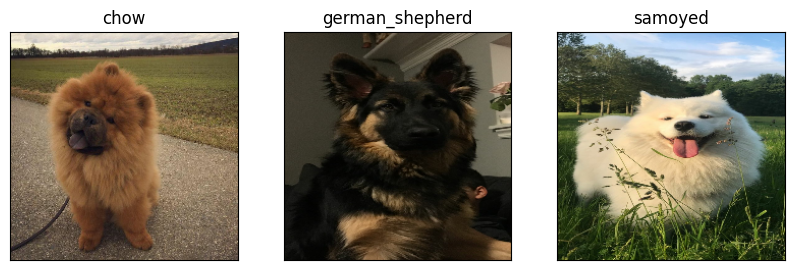

In [200]:
#check image for predictions 
plt.figure(figsize=(10,10))
for i , image in enumerate(custom_images):
    plt.subplot(1,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.title(custom_pred_labels[i]) #labels that our model predicted
    plt.imshow(image)